In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import seaborn as sns

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class_label"]
df["class_label"] = df["class_label"].str.replace("Iris-", "")

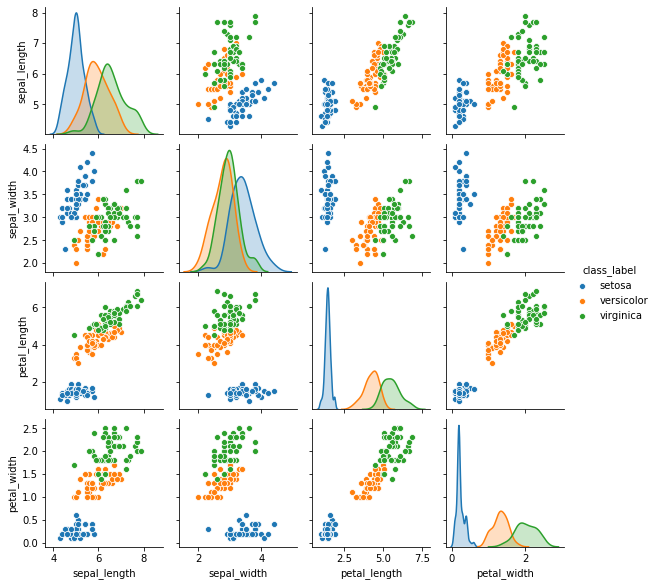

In [2]:
sns.pairplot(df, hue="class_label", height=2)

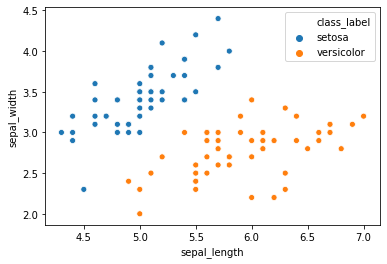

In [3]:
df = df.query("class_label != 'virginica'")
X = df[["sepal_length", "sepal_width"]]
y = np.where(df["class_label"] == 'setosa', -1, 1)

sns.scatterplot("sepal_length", "sepal_width", data=df, hue="class_label")

In [4]:
class AdalineGD(object):
    
    def __init__(self, eta=0.01, epochs=50): 
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.epochs):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        return self.net_input(X)

    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1)

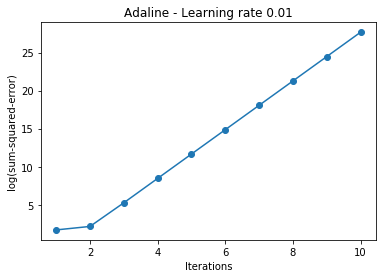

In [5]:
ada = AdalineGD(epochs=10, eta=0.01).train(X, y)
plt.plot(range(1, len(ada.cost_)+1), np.log10(ada.cost_), marker='o')
plt.xlabel('Iterations')
plt.ylabel('log(sum-squared-error)')
plt.title('Adaline - Learning rate 0.01')
plt.show()

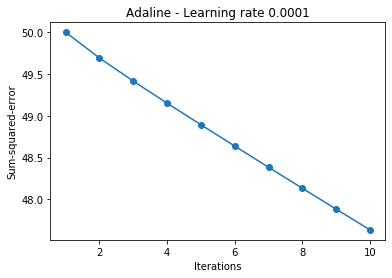

In [6]:
ada = AdalineGD(epochs=10, eta=0.0001).train(X, y)
plt.plot(range(1, len(ada.cost_)+1), ada.cost_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Sum-squared-error')
plt.title('Adaline - Learning rate 0.0001')
plt.show()

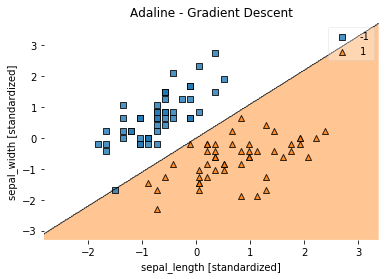

In [7]:
# standardize features
X_std = X.apply(lambda x: (x - x.mean())/x.std(), axis=0)

ada = AdalineGD(epochs=15, eta=0.01)

ada.train(X_std, y)
plot_decision_regions(X_std.values, y, clf=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal_length [standardized]')
plt.ylabel('sepal_width [standardized]')
plt.show()